# 📊 02 – Factor Modeling with PCA and Regression

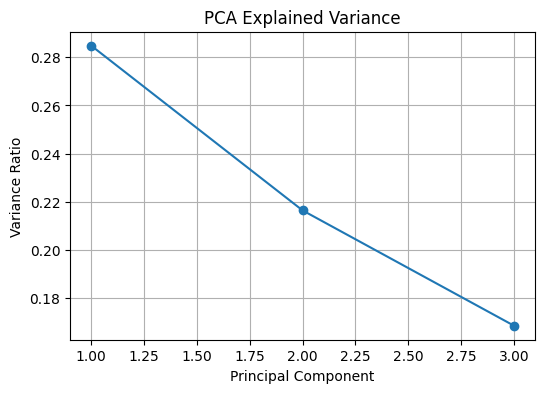

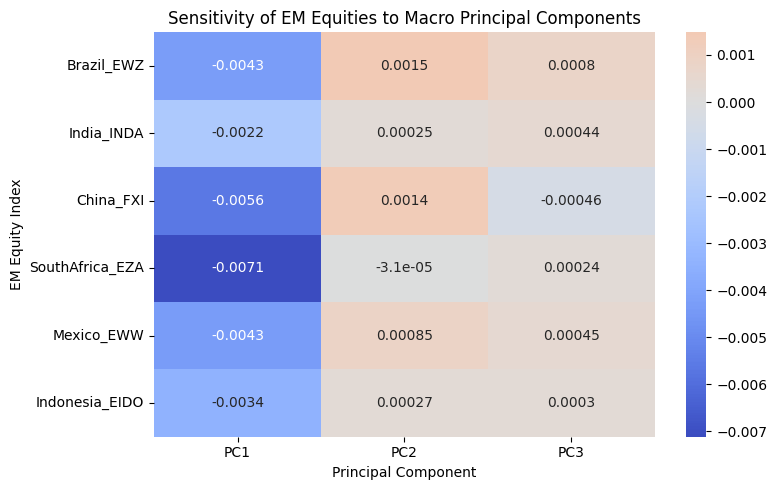

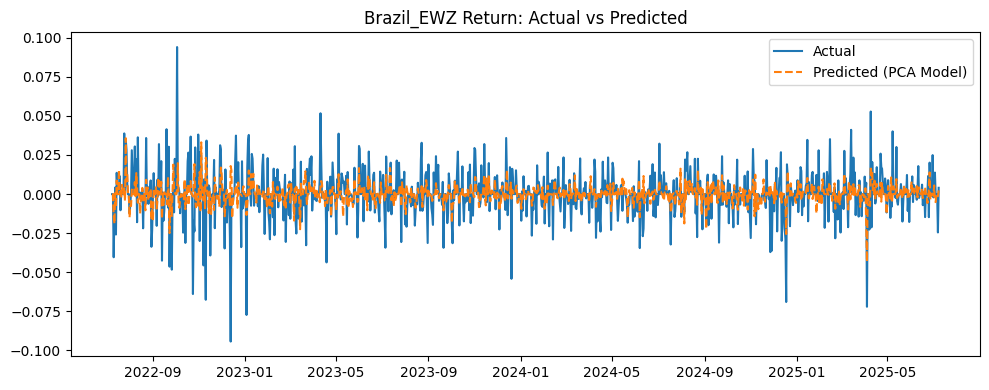

In [1]:

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/combined_em_macro_data.txt', parse_dates=['date'], index_col='date')
log_returns = np.log(df / df.shift(1)).dropna()

em_columns = [col for col in df.columns if col.startswith(('Brazil', 'India', 'China', 'SouthAfrica', 'Mexico', 'Indonesia'))]
macro_columns = [col for col in df.columns if col not in em_columns]

Y = log_returns[em_columns]
X = log_returns[macro_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(6, 4))
plt.plot(range(1, 4), explained_var, marker='o')
plt.title('PCA Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.grid(True)
plt.show()

betas = {}
r2_scores = {}
for col in Y.columns:
    model = LinearRegression().fit(X_pca, Y[col])
    betas[col] = model.coef_
    r2_scores[col] = model.score(X_pca, Y[col])

beta_df = pd.DataFrame(betas, index=['PC1', 'PC2', 'PC3']).T

plt.figure(figsize=(8, 5))
sns.heatmap(beta_df, annot=True, cmap='coolwarm', center=0)
plt.title('Sensitivity of EM Equities to Macro Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('EM Equity Index')
plt.tight_layout()
plt.show()

sample_col = 'Brazil_EWZ'
model = LinearRegression().fit(X_pca, Y[sample_col])
Y_pred = model.predict(X_pca)

plt.figure(figsize=(10, 4))
plt.plot(Y.index, Y[sample_col], label='Actual', linewidth=1.5)
plt.plot(Y.index, Y_pred, label='Predicted (PCA Model)', linestyle='--')
plt.title(f"{sample_col} Return: Actual vs Predicted")
plt.legend()
plt.tight_layout()
plt.show()


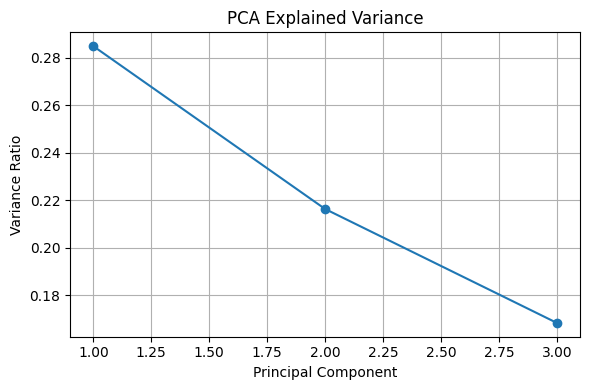

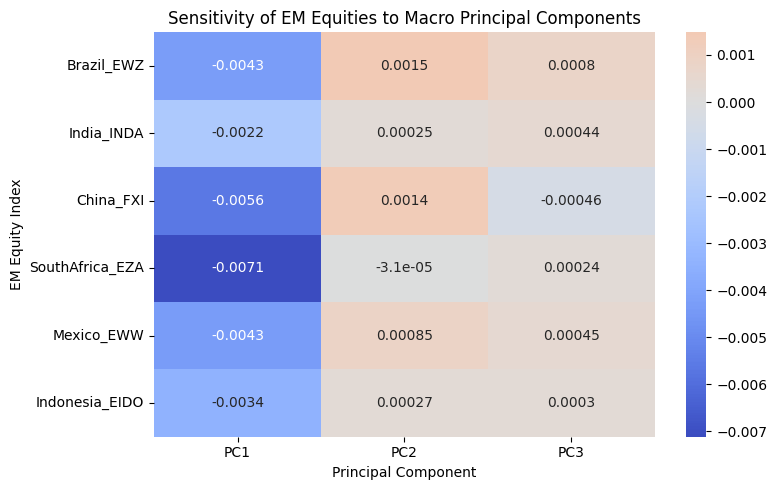

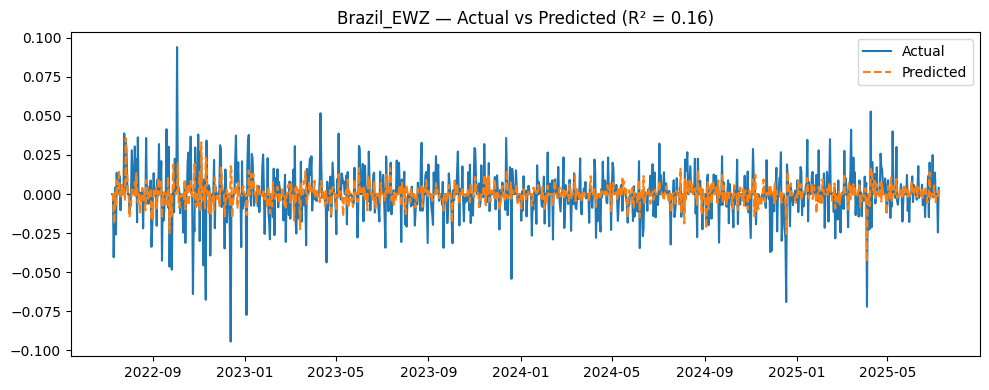

<Figure size 640x480 with 0 Axes>

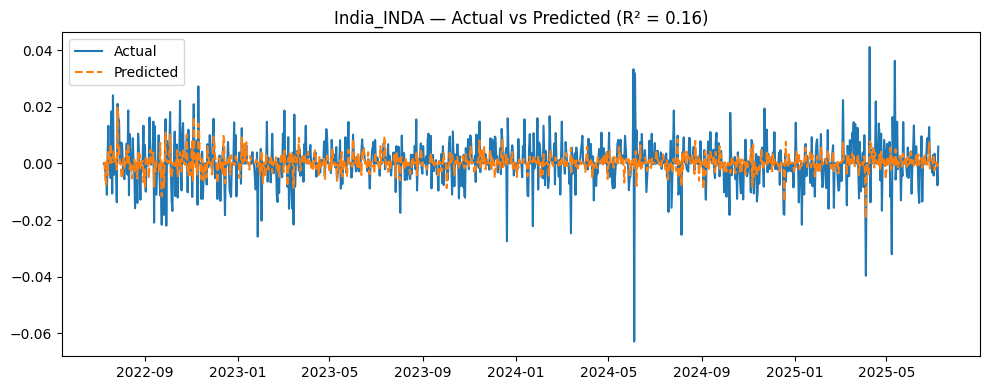

<Figure size 640x480 with 0 Axes>

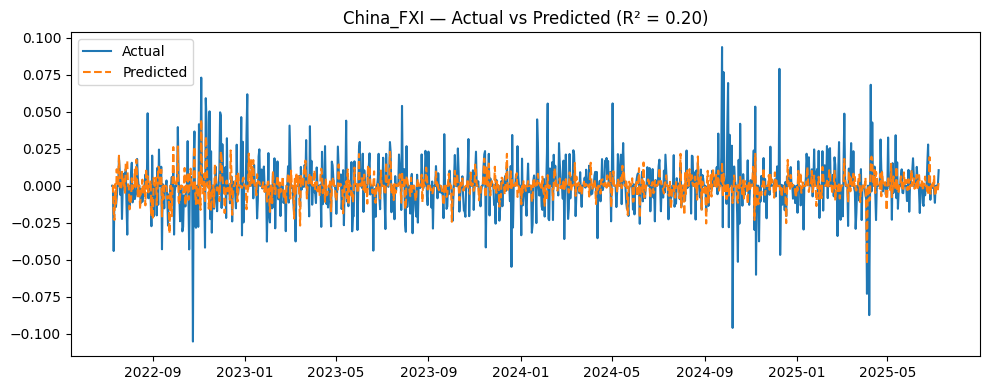

<Figure size 640x480 with 0 Axes>

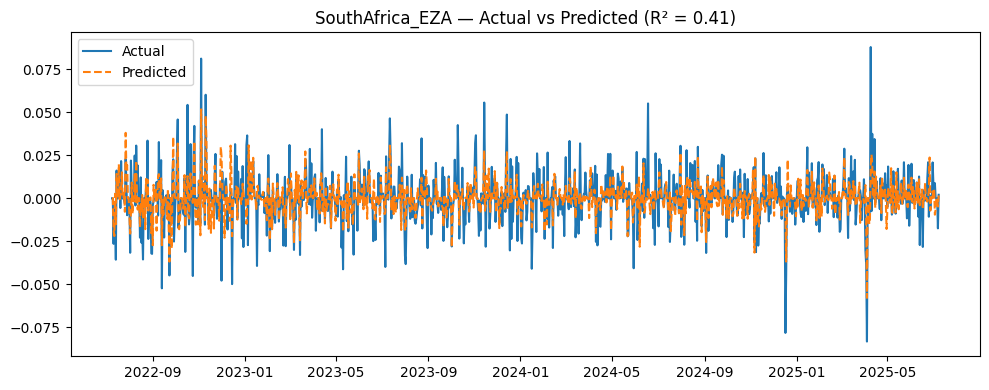

<Figure size 640x480 with 0 Axes>

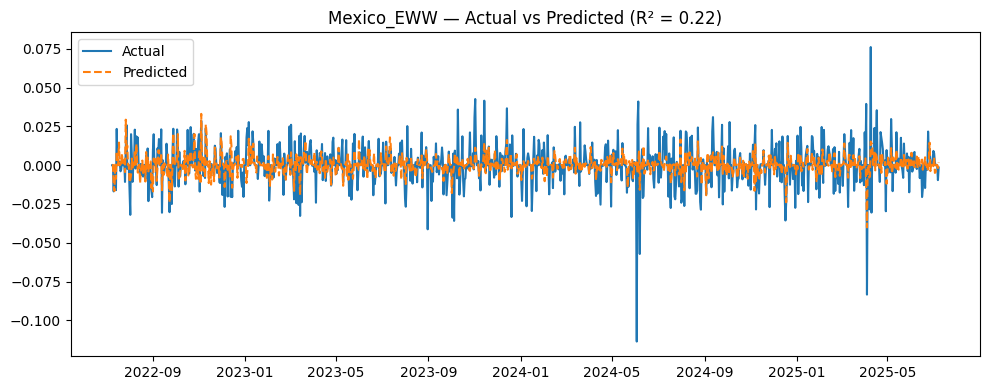

<Figure size 640x480 with 0 Axes>

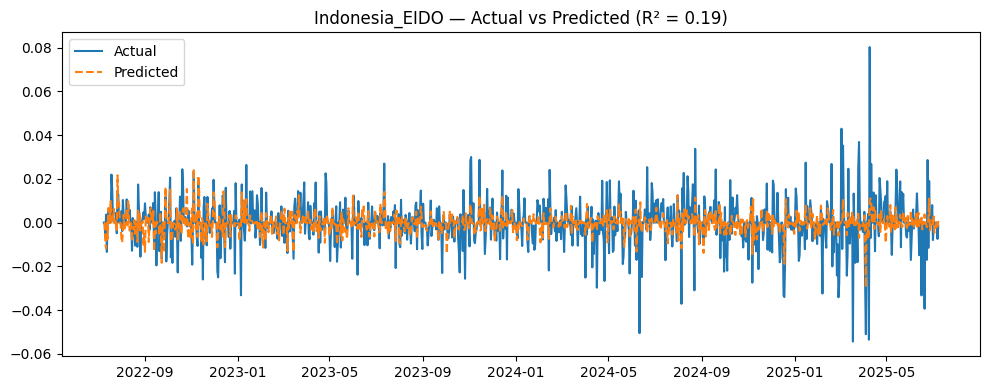

'../output/plots/r2_scores_by_em_index.png'

<Figure size 640x480 with 0 Axes>

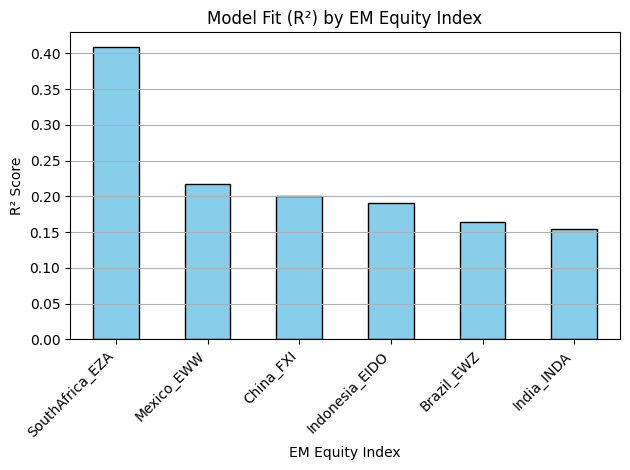

In [7]:
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load and process data
df = pd.read_csv('../data/combined_em_macro_data.txt', parse_dates=['date'], index_col='date')
log_returns = np.log(df / df.shift(1)).dropna()

# Separate EM indices and macro variables
em_columns = [col for col in df.columns if col.startswith(('Brazil', 'India', 'China', 'SouthAfrica', 'Mexico', 'Indonesia'))]
macro_columns = [col for col in df.columns if col not in em_columns]

Y = log_returns[em_columns]
X = log_returns[macro_columns]

# Standardize and apply PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
explained_var = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(6, 4))
plt.plot(range(1, 4), explained_var, marker='o')
plt.title('PCA Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

# Fit linear model for each EM index
betas = {}
r2_scores = {}
for col in Y.columns:
    model = LinearRegression().fit(X_pca, Y[col])
    betas[col] = model.coef_
    r2_scores[col] = model.score(X_pca, Y[col])

beta_df = pd.DataFrame(betas, index=['PC1', 'PC2', 'PC3']).T

# Heatmap of betas
plt.figure(figsize=(8, 5))
sns.heatmap(beta_df, annot=True, cmap='coolwarm', center=0)
plt.title('Sensitivity of EM Equities to Macro Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('EM Equity Index')
plt.tight_layout()
plt.show()

# Create plots output directory
plot_dir = '../output/plots'
os.makedirs(plot_dir, exist_ok=True)

# Plot and save actual vs. predicted charts for all EM indices
for col in Y.columns:
    model = LinearRegression().fit(X_pca, Y[col])
    Y_pred = model.predict(X_pca)
    r2 = model.score(X_pca, Y[col])

    plt.figure(figsize=(10, 4))
    plt.plot(Y.index, Y[col], label='Actual', linewidth=1.5)
    plt.plot(Y.index, Y_pred, label='Predicted', linestyle='--')
    plt.title(f'{col} — Actual vs Predicted (R² = {r2:.2f})')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Save each figure
    filename = col.replace(" ", "_").replace("/", "_") + '.png'
    plt.savefig(os.path.join(plot_dir, filename))

local_output_path = '../output/plots'
os.makedirs(local_output_path, exist_ok=True)
# Create a DataFrame for R² scores
r2_df = pd.DataFrame.from_dict(r2_scores, orient='index', columns=['R² Score'])
r2_df.index.name = 'EM Equity Index'
r2_df.sort_values("R² Score", ascending=False, inplace=True)

# Save the plot
plot_filename = os.path.join(local_output_path, "r2_scores_by_em_index.png")
r2_df.plot(kind='bar', legend=False, color='skyblue', edgecolor='black')
plt.ylabel("R² Score")
plt.title("Model Fit (R²) by EM Equity Index")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.savefig(plot_filename)

plot_filename